In [1]:
#%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
#import datetime
# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key
import scipy.stats as stats
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load in csv
covid_df = pd.read_csv("Resources/combined_covid_census_data.csv")
covid_df.head()

,County,Cumulative Deaths by End of Month,New Deaths During Month,Cumulative Confirmed Cases by End of Month,New Confirmed Cases During Month,Month,Year,Latitude,Longitude,Median Income,...,Number of Poeple in Poverty,Median Age,Total Population,Percent White,Percent Black,Percent American Indian,Percent Asian,Percent Identifying as Mixed Race,Percent Hispanic,Percent of Pop Using Public Transit
0,Alameda,858,279,75947,21354,Jan,2021,37.65,-121.89,104888.0,...,152060.0,37.8,1661584.0,631037.0,171922.0,11037.0,519249.0,130496.0,369546.0,114029.0
1,Alpine,0,0,74,7,Jan,2021,38.60,-119.82,85750.0,...,139.0,47.6,1159.0,663.0,10.0,360.0,6.0,111.0,183.0,4.0
2,Amador,32,8,3260,727,Jan,2021,38.45,-120.66,65187.0,...,2872.0,49.9,39023.0,33040.0,931.0,276.0,375.0,2834.0,5591.0,35.0
3,Butte,141,36,11789,3182,Jan,2021,39.67,-121.60,54972.0,...,39676.0,36.9,223344.0,178568.0,3866.0,2628.0,10743.0,15608.0,37585.0,1010.0
4,Calaveras,21,0,1796,607,Jan,2021,38.21,-120.55,67054.0,...,5177.0,52.8,45828.0,40058.0,450.0,518.0,864.0,2912.0,5710.0,142.0


In [4]:
covid_df2 = covid_df.rename(columns={"Cumulative Deaths by End of Month": "Deaths End of Month", 
                                     "Cumulative Confirmed Cases by End of Month": "Cumulative Cases EoM",
                                     "New Confirmed Cases During Month": "New Cases During Month",
                                     "Percent White": "White", "Percent Black": "Black", 
                                     "Percent American Indian": "American Indian", 
                                     "Percent Asian": "Asian",
                                     "Percent Identifying as Mixed Race":"Mixed Race", 
                                     "Percent Hispanic": "Hispanic",
                                     "Percent of Pop Using Public Transit": "Use Public Transit",   
                                     "Number of Poeple in Poverty":"Number of Poeple in Poverty",
                                     "Deaths End of Month": "Deaths End of Month"
                                    })

In [5]:
covid_df2.head()

,County,Deaths End of Month,New Deaths During Month,Cumulative Cases EoM,New Cases During Month,Month,Year,Latitude,Longitude,Median Income,...,Number of Poeple in Poverty,Median Age,Total Population,White,Black,American Indian,Asian,Mixed Race,Hispanic,Use Public Transit
0,Alameda,858,279,75947,21354,Jan,2021,37.65,-121.89,104888.0,...,152060.0,37.8,1661584.0,631037.0,171922.0,11037.0,519249.0,130496.0,369546.0,114029.0
1,Alpine,0,0,74,7,Jan,2021,38.60,-119.82,85750.0,...,139.0,47.6,1159.0,663.0,10.0,360.0,6.0,111.0,183.0,4.0
2,Amador,32,8,3260,727,Jan,2021,38.45,-120.66,65187.0,...,2872.0,49.9,39023.0,33040.0,931.0,276.0,375.0,2834.0,5591.0,35.0
3,Butte,141,36,11789,3182,Jan,2021,39.67,-121.60,54972.0,...,39676.0,36.9,223344.0,178568.0,3866.0,2628.0,10743.0,15608.0,37585.0,1010.0
4,Calaveras,21,0,1796,607,Jan,2021,38.21,-120.55,67054.0,...,5177.0,52.8,45828.0,40058.0,450.0,518.0,864.0,2912.0,5710.0,142.0


In [6]:
print(covid_df2.columns.tolist())

['County', 'Deaths End of Month', 'New Deaths During Month', 'Cumulative Cases EoM', 'New Cases During Month', 'Month', 'Year', 'Latitude', 'Longitude', 'Median Income', 'Income per Capita', 'Number of Poeple in Poverty', 'Median Age', 'Total Population', 'White', 'Black', 'American Indian', 'Asian', 'Mixed Race', 'Hispanic', 'Use Public Transit']


In [7]:
# adding new columns
Perc_white = (covid_df2['White']/covid_df2['Total Population'])*100 
Perc_black = (covid_df2['Black']/covid_df2['Total Population'])*100 
Perc_Amer_indian = (covid_df2['American Indian']/covid_df2['Total Population'])*100 
Perc_Asian = (covid_df2['Asian']/covid_df2['Total Population'])*100 
Perc_Mixed_Race = (covid_df2['Mixed Race']/covid_df2['Total Population'])*100 
Perc_Hispanic = (covid_df2['Hispanic']/covid_df2['Total Population'])*100 
Perc_Public_Transit = (covid_df2['Use Public Transit']/covid_df2['Total Population'])*100
Perc_Poverty = (covid_df2['Number of Poeple in Poverty']/covid_df2['Total Population'])*100
Perc_Death_EoM = (covid_df2['Deaths End of Month']/covid_df2['Total Population'])*100 
Perc_New_Death_Mon = (covid_df2['New Deaths During Month']/covid_df2['Total Population'])*100 
Perc_Cases_EoM = (covid_df2['Cumulative Cases EoM']/covid_df2['Total Population'])*100 
Perc_Newcases_Mon = (covid_df2['New Cases During Month']/covid_df2['Total Population'])*100
Perc_Death_newcase = (covid_df2['New Deaths During Month']/covid_df2['New Cases During Month'])*100






In [8]:
#add the columns
covid_df2["Percent_white"]= Perc_white
covid_df2["Percent_black"]= Perc_black
covid_df2["Percent_Amer_indian"]= Perc_Amer_indian
covid_df2["Percent_Asian"]= Perc_Asian
covid_df2["Percent_Mixed_Race"]= Perc_Mixed_Race
covid_df2["Percent_Hispanic"]= Perc_Hispanic
covid_df2["Percent_Amer_indian"]= Perc_Amer_indian
covid_df2["Percent_Public_Transit"]= Perc_Public_Transit
covid_df2["Percent_Poverty"]= Perc_Poverty
covid_df2["Percent_Death_EoM"]= Perc_Death_EoM
covid_df2["Percent_New_Death_Mon"]= Perc_New_Death_Mon
covid_df2["Percent_Cases_EoM"]= Perc_Cases_EoM
covid_df2["Percent_Newcases_Mon"]= Perc_Newcases_Mon
covid_df2["Percent_Death_newcase"]= Perc_Death_newcase





In [9]:
covid_df2

,County,Deaths End of Month,New Deaths During Month,Cumulative Cases EoM,New Cases During Month,Month,Year,Latitude,Longitude,Median Income,...,Percent_Asian,Percent_Mixed_Race,Percent_Hispanic,Percent_Public_Transit,Percent_Poverty,Percent_Death_EoM,Percent_New_Death_Mon,Percent_Cases_EoM,Percent_Newcases_Mon,Percent_Death_newcase
0,Alameda,858,279,75947,21354,Jan,2021,37.65,-121.89,104888.0,...,31.250241,7.853711,22.240585,6.862668,9.151508,0.051637,0.016791,4.570759,1.285159,1.306547
1,Alpine,0,0,74,7,Jan,2021,38.60,-119.82,85750.0,...,0.517688,9.577222,15.789474,0.345125,11.993097,0.000000,0.000000,6.384814,0.603969,0.000000
2,Amador,32,8,3260,727,Jan,2021,38.45,-120.66,65187.0,...,0.960972,7.262384,14.327448,0.089691,7.359762,0.082003,0.020501,8.354048,1.863004,1.100413
3,Butte,141,36,11789,3182,Jan,2021,39.67,-121.60,54972.0,...,4.810069,6.988323,16.828301,0.452217,17.764525,0.063131,0.016119,5.278405,1.424708,1.131364
4,Calaveras,21,0,1796,607,Jan,2021,38.21,-120.55,67054.0,...,1.885310,6.354194,12.459632,0.309854,11.296587,0.045824,0.000000,3.919001,1.324518,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Tulare,1160,61,89376,3491,Dec,2021,36.22,-118.80,52534.0,...,3.730965,8.009397,65.075061,0.241403,21.469755,0.250024,0.013148,19.263937,0.752444,1.747350
692,Tuolumne,91,0,8170,401,Dec,2021,38.03,-119.95,60509.0,...,1.390659,5.150793,12.576874,0.168061,10.275731,0.168061,0.000000,15.088555,0.740577,0.000000
693,Ventura,1211,20,113907,9834,Dec,2021,34.44,-119.09,89295.0,...,7.242085,8.502139,42.768262,0.472801,8.804291,0.143212,0.002365,13.470569,1.162963,0.203376
694,Yolo,270,10,23281,1741,Dec,2021,38.68,-121.90,73746.0,...,14.436816,9.747959,31.695265,1.872709,17.916663,0.123415,0.004571,10.641575,0.795798,0.574383


In [10]:
print(covid_df2.columns.tolist())

['County', 'Deaths End of Month', 'New Deaths During Month', 'Cumulative Cases EoM', 'New Cases During Month', 'Month', 'Year', 'Latitude', 'Longitude', 'Median Income', 'Income per Capita', 'Number of Poeple in Poverty', 'Median Age', 'Total Population', 'White', 'Black', 'American Indian', 'Asian', 'Mixed Race', 'Hispanic', 'Use Public Transit', 'Percent_white', 'Percent_black', 'Percent_Amer_indian', 'Percent_Asian', 'Percent_Mixed_Race', 'Percent_Hispanic', 'Percent_Public_Transit', 'Percent_Poverty', 'Percent_Death_EoM', 'Percent_New_Death_Mon', 'Percent_Cases_EoM', 'Percent_Newcases_Mon', 'Percent_Death_newcase']


The r-squared is: 0.015610193690449466


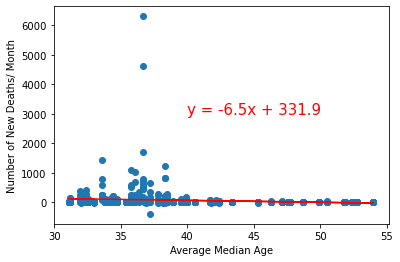

In [72]:
#Number new death by avarage median age
x_values = covid_df2['Median Age']
y_values = covid_df2['New Deaths During Month']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,3000),fontsize=15,color="red")
plt.xlabel('Average Median Age')
plt.ylabel('Number of New Deaths/ Month')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [20]:
Per_county = covid_df2.groupby(["County"])
Per_county

In [23]:
# do group by to geat mean value
#Mean_Covid_df = covid_df2.groupby(["Month"]).mean()
Mean_Covid_df = covid_df2.groupby(["Month"]).mean()[["Percent_New_Death_Mon"]]
Mean_Covid_df

,Percent_New_Death_Mon
Month,
Apr,0.003530
Aug,0.006645
Dec,0.006458
Feb,0.019698
Jan,0.021152
Jul,0.002712
Jun,0.003049
Mar,0.010129
May,0.002621


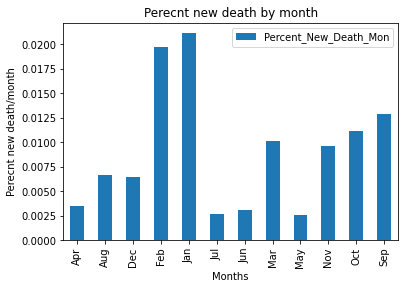

In [32]:
#perecnt new death by month
Mean_Covid_df.plot.bar(y="Percent_New_Death_Mon")
#set chart title
plt.title("Perecnt new death by month")
plt.xlabel("Months")
plt.ylabel("Perecnt new death/month")
plt.show()

In [34]:
# do group by to geat mean value
Mean_County_df = covid_df2.groupby(["County"]).mean()[["Median Age"]]
Mean_County_df

,Median Age
County,
Alameda,37.8
Alpine,47.6
Amador,49.9
Butte,36.9
Calaveras,52.8
Colusa,35.4
Contra Costa,39.9
Del Norte,40.0
El Dorado,46.3


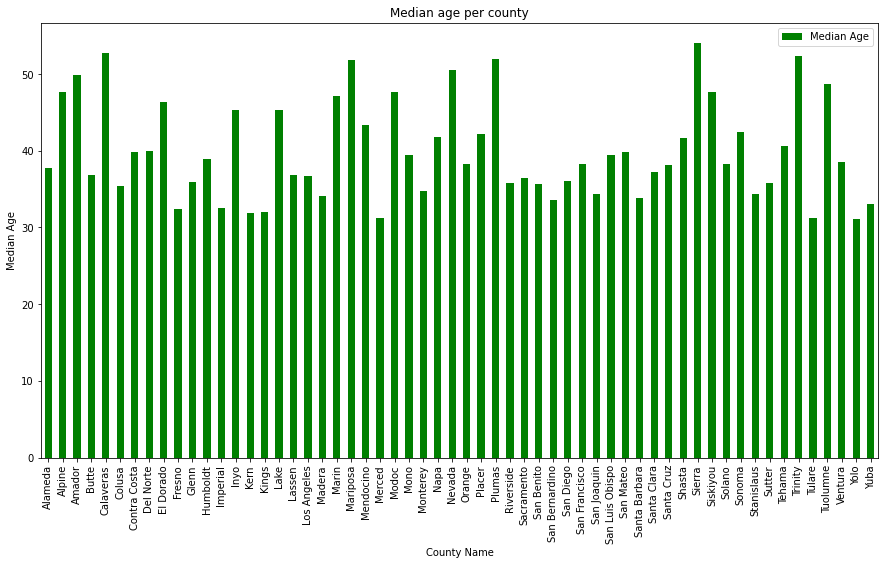

In [39]:
#Graph of median age by county
Mean_County_df.plot.bar(y="Median Age", color="green", figsize=(15,8))
#set chart title
plt.title("Median age per county")
plt.xlabel("County Name")
plt.ylabel("Median Age")
plt.show()

The r-squared is: 0.001132524599850937


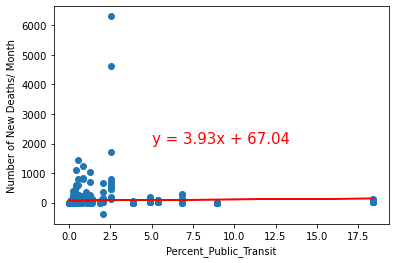

In [70]:
#Number new death by avarage median age
x_values = covid_df2['Percent_Public_Transit']
y_values = covid_df2['New Deaths During Month']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,2000),fontsize=15,color="red")
plt.xlabel('Percent_Public_Transit')
plt.ylabel('Number of New Deaths/ Month')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#new data below this

In [73]:
# Load new Vaccination csv data to work with
Vacc_df = pd.read_csv("Resources/Vaccination_CA.csv")
Vacc_df.head()

,date,area,area_type,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,...,Perecent_boost,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,boosted_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,boosted_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k,boosted_deaths_per_100k
0,2/1/2021,California,State,13867,24,0,773,1,0,12,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/2/2021,California,State,11388,18,0,600,0,0,15,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/3/2021,California,State,10360,27,0,548,0,0,18,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/4/2021,California,State,9030,18,0,484,0,0,19,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/5/2021,California,State,8429,15,0,500,0,0,28,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Drop any rows with null values
Vacc_clean_df = Vacc_df
Vacc_clean_df = Vacc_clean_df.dropna()

Vacc_clean_df

,date,area,area_type,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,...,Perecent_boost,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,boosted_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,boosted_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k,boosted_deaths_per_100k
193,8/13/2021,California,State,8333,3023,4,689,119,0,103,...,0.01,85.314279,14.337935,48.467224,6.833112,0.536572,0.000000,0.694446,0.049838,0.000000
194,8/14/2021,California,State,5809,2279,5,572,115,1,80,...,0.01,85.290705,14.282335,61.664954,6.842436,0.543775,6.851662,0.744255,0.048494,0.000000
195,8/15/2021,California,State,5087,1943,6,565,90,0,61,...,0.01,85.087744,14.061435,76.149863,6.896815,0.529962,5.076658,0.747315,0.048472,0.000000
196,8/16/2021,California,State,9817,3612,5,713,165,0,93,...,0.02,85.069138,13.935362,77.157517,6.871699,0.539600,3.857876,0.797449,0.056800,0.000000
197,8/17/2021,California,State,9429,3480,1,745,149,0,100,...,0.02,84.857206,13.677619,63.911376,6.899421,0.555534,3.043399,0.859072,0.058647,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,7/13/2022,California,State,10167,2468,5958,217,44,80,17,...,141.64,228.649954,19.829962,33.523562,5.429738,0.432764,0.578901,0.453357,0.041758,0.030374
528,7/14/2022,California,State,9708,2260,5377,210,39,73,10,...,141.78,228.036507,19.424501,32.799517,5.458667,0.421584,0.536643,0.446682,0.037981,0.031252
529,7/15/2022,California,State,8804,2243,5099,195,31,57,15,...,141.94,225.238068,19.256849,32.282636,5.350407,0.393953,0.501544,0.408321,0.027868,0.031235
530,7/16/2022,California,State,5924,1498,3645,155,29,56,12,...,142.01,224.302763,19.167729,32.039195,5.169581,0.362372,0.450565,0.366237,0.027875,0.029443


In [85]:
print(Vacc_clean_df.columns.tolist())

['date', 'area', 'area_type', 'unvaccinated_cases', 'vaccinated_cases', 'boosted_cases', 'unvaccinated_hosp', 'vaccinated_hosp', 'boosted_hosp', 'unvaccinated_deaths', 'vaccinated_deaths', 'boosted_deaths', 'population_unvaccinated', 'population_vaccinated', 'Perecent_vacc', 'population_boosted', 'Perecent_boost', 'unvaccinated_cases_per_100k', 'vaccinated_cases_per_100k', 'boosted_cases_per_100k', 'unvaccinated_hosp_per_100k', 'vaccinated_hosp_per_100k', 'boosted_hosp_per_100k', 'unvaccinated_deaths_per_100k', 'vaccinated_deaths_per_100k', 'boosted_deaths_per_100k']


The r-squared is: 0.1226251522753632


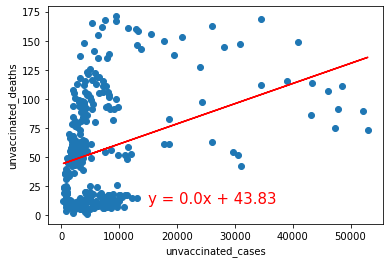

In [82]:
# Plot vacc vs death on a scatterplot
x_values = Vacc_clean_df['vaccinated_cases']
y_values = Vacc_clean_df['unvaccinated_deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,10),fontsize=15,color="red")
plt.xlabel('unvaccinated_cases')
plt.ylabel('unvaccinated_deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6218079261436849


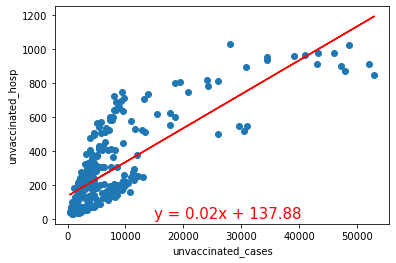

In [83]:
# Plot vacc vs death on a scatterplot
x_values = Vacc_clean_df['unvaccinated_cases']
y_values = Vacc_clean_df['unvaccinated_hosp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,10),fontsize=15,color="red")
plt.xlabel('unvaccinated_cases')
plt.ylabel('unvaccinated_hosp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.842046251442898


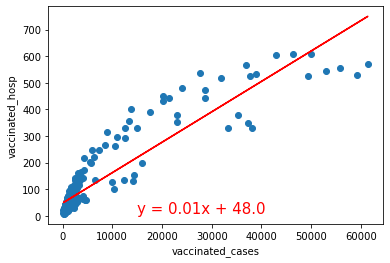

In [84]:
# Plot vacc vs death on a scatterplot
x_values = Vacc_clean_df['vaccinated_cases']
y_values = Vacc_clean_df['vaccinated_hosp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,10),fontsize=15,color="red")
plt.xlabel('vaccinated_cases')
plt.ylabel('vaccinated_hosp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.15879173229952115


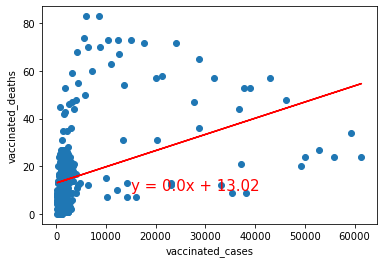

In [86]:
# Plot vacc vs death on a scatterplot
x_values = Vacc_clean_df['vaccinated_cases']
y_values = Vacc_clean_df['vaccinated_deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,10),fontsize=15,color="red")
plt.xlabel('vaccinated_cases')
plt.ylabel('vaccinated_deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.16615013518905639


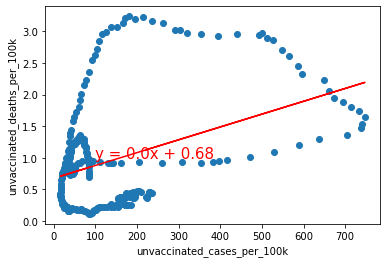

In [90]:
# Plot vacc vs death on a scatterplot
x_values = Vacc_clean_df['unvaccinated_cases_per_100k']
y_values = Vacc_clean_df['unvaccinated_deaths_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,1),fontsize=15,color="red")
plt.xlabel('unvaccinated_cases_per_100k')
plt.ylabel('unvaccinated_deaths_per_100k')
print(f"The r-squared is: {rvalue**2}")
plt.show()